# Monte Carlo slopes

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from numpy.random import default_rng
from sklearn.linear_model import LinearRegression

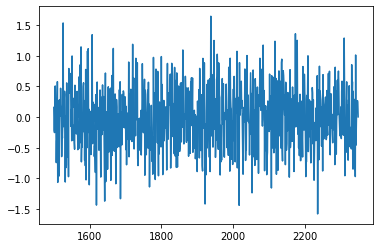

In [2]:
rng = default_rng(200)

x = np.arange(1500,2350)
x_mean = np.mean(x)
x_std = np.std(x)
# x_norm = (x-x_mean)/x_std

t_noise = rng.standard_normal(len(x))*0.5
plt.plot(x,t_noise)

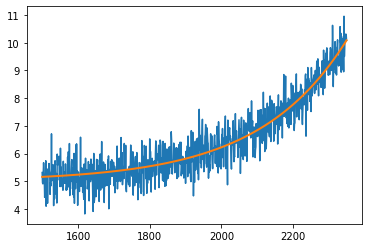

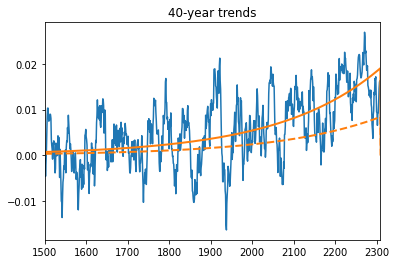

In [24]:
chunk_len = 40

for trend_val in (1.,):
    forced_component = np.exp(trend_val*(x-1950)/x_std)+5
    t_total = t_noise + forced_component

    plt.figure()
    plt.plot(x,t_total)
    plt.plot(x,forced_component, linewidth=2)
    plt.show()
    
    slopes = []
    slopes = np.zeros((len(x)))

    forced_slopes = []
    forced_slopes = np.zeros((len(x)))

    for iy in np.arange(0,len(x)-chunk_len):
        model = LinearRegression().fit(x[iy:iy+chunk_len].reshape(-1, 1), t_total[iy:iy+chunk_len])
        slopes[iy] = model.coef_
        
        model_forced = LinearRegression().fit(x[iy:iy+chunk_len].reshape(-1, 1), forced_component[iy:iy+chunk_len])
        forced_slopes[iy] = model_forced.coef_
        
    
    plt.figure()
    plt.plot(x,slopes)
    plt.plot(x,forced_slopes, linewidth=2)
    plt.plot(x,forced_slopes*.44, linestyle='--', linewidth=2, color='tab:orange')
    plt.title(str(chunk_len) + '-year trends')
    plt.xlim(np.min(x),np.max(x)-(chunk_len+2))
    plt.show()

    